In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# Safety of the cooking solution

We want to check the percentage of accident and no accident with the proposed cooking solutions.
This corresponds to the section I31 of the Raw data.


In [5]:
raw_data_I = pd.read_excel('complete_dataset.xlsx', sheet_name= 'Section_I')

In [6]:
# Quick visualization of the dataset
raw_data_I.head()

,Unnamed: 0,HHID,I2,I3,I4,I5,I6,I7,I8,I9,...,I34_2,I34_3,I34_4,I34_5,I34_6,I34_7,I34_8,I34_9,I34_10,I34_11
0,1,1102020811001,2,1,3.0,5.0,2.0,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1102020811001,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1102020811002,1,1,3.0,5.0,2.0,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1102020811003,6,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1102020811003,4,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Get info about the raw data 
raw_data_I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22065 entries, 0 to 22064
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  22065 non-null  int64  
 1   HHID        22065 non-null  int64  
 2   I2          22065 non-null  int64  
 3   I3          22065 non-null  int64  
 4   I4          3625 non-null   float64
 5   I5          2217 non-null   float64
 6   I6          3625 non-null   float64
 7   I7          1012 non-null   object 
 8   I8          3625 non-null   float64
 9   I9          3625 non-null   float64
 10  I10         3625 non-null   float64
 11  I11         3625 non-null   float64
 12  I12_1       81 non-null     float64
 13  I12_2       87 non-null     float64
 14  I12_3       92 non-null     float64
 15  I12_4       108 non-null    float64
 16  I12_5       77 non-null     float64
 17  I12_6       85 non-null     float64
 18  I12_7       89 non-null     float64
 19  I12_8       97 non-null  

In [8]:
codebook_I = pd.read_excel('codebook.xlsx', sheet_name= 'Section I')

####  Note:
We focus on I34 that corresponds to the postential injuries occured with the cookstoves.

In [156]:
# From the raw_data_I (I34 corresponds to column 53 to 61)
data_injuries = raw_data_I.iloc[:, 53:61]
data_injuries

,I31_1,I31_2,I31_3,I31_4,I31_5,I31_6,I31_7,I31_8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
22060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
22061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


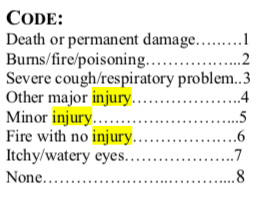

In [132]:
Image("cooking_injuries.png")

 According to the screenshot above:
 
 I31_ (1-2-3-4): considered as accident.
 
 I31_ (5-6-7-8): considered as no accident. 

In [157]:
# Count the number of every kind of injury/no injury and store it in values table 

values = []
for i in range(53,61):
    values.append(len(raw_data_I.iloc[:, i:i+1].dropna()))

# Count the number of accident and No_accident according to what we defined above.
accident = 0
No_accident = 0

# First 4: accident
for i in range(len(values)-4):
    accident += values[i] 

# Last 4: no accident
for i in range(1,5):
    No_accident += values[-i] 


accident_perc = accident*100/(accident+ No_accident)
No_accident_perc = No_accident*100/(accident+ No_accident)

print("% accident:",accident_perc, "% no accident:",No_accident_perc)

% accident: 2.2814733369983506 % no accident: 97.71852666300165


<AxesSubplot:title={'center':'Proportion of accident'}>

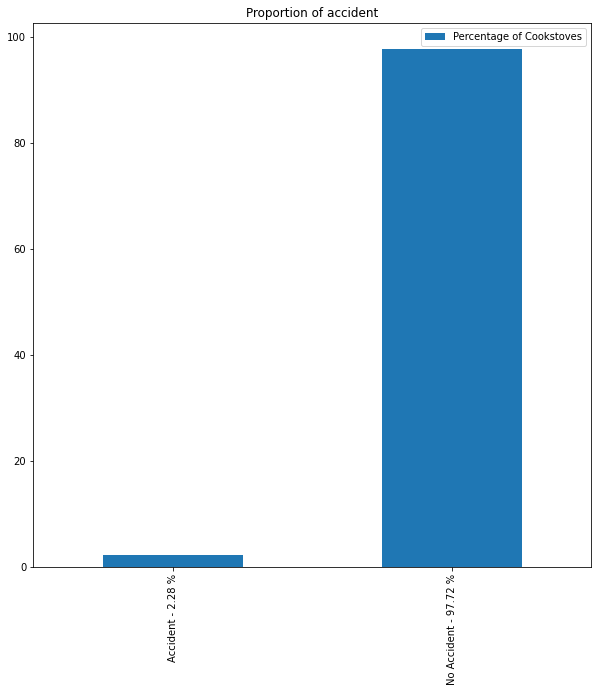

In [158]:
# plot the results with barplots. 

percent = [accident_perc, No_accident_perc] 
index = ['Accident', 'No Accident']
pie_ = pd.DataFrame({'Percentage of Cookstoves': percent},
                  index = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(index, percent)])

pie_.plot.bar(y ='Percentage of Cookstoves', figsize=(10, 10), title = 'Proportion of accident')



#### Comments
In the MFT report: 2.0% of accident in the plots, 2.2% of accident in the pdf. Here: 2.8%

Let's do the same but instead of calculating the percentage of cookstoves that led to injuries, let's calculate the percentage of household that led to injuries.

In [155]:
# Check the number of household
n_household = len(np.unique(raw_data_I["HHID"]))
print('number of household:',n_household)
print('number of cookstoves:',3638)

number of household: 3295
number of cookstoves: 3638


In [65]:
# Information per household: 
# Here we gather the cookstoves to each households 
data_I_households = raw_data_I.groupby(['HHID']).sum()
data_I_households
data_injuries_households = data_I_households.iloc[:, 51:59]
data_injuries_households

,I31_1,I31_2,I31_3,I31_4,I31_5,I31_6,I31_7,I31_8
HHID,,,,,,,,
1102020811001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1102020811002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1102020811003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1102020811004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1102020811005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...
5714040157078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
5714040157079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
5714040157082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [70]:
# Replace 0.0 values by NaN
data_injuries_households = data_injuries_households.replace(0.0, np.NaN)
data_injuries_households

,I31_1,I31_2,I31_3,I31_4,I31_5,I31_6,I31_7,I31_8
HHID,,,,,,,,
1102020811001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1102020811002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1102020811003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
1102020811004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1102020811005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...
5714040157078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
5714040157079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
5714040157082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


In [160]:
# Count the number of every kind of injury/no injury and store it in values table 
values = []
for i in range(8):
    values.append(len(data_injuries_households.iloc[:, i:i+1].dropna()))

# Count the number of accident and No_accident according to what we defined above.
accident = 0
No_accident = 0

# First 4: accident
for i in range(len(values)-4):
    accident += values[i] 

# Last 4: no accident
for i in range(1,5):
    No_accident += values[-i] 


accident_perc = accident*100/(accident+ No_accident)
No_accident_perc = No_accident*100/(accident+ No_accident)

print("% accident:",accident_perc, "% no accident:",No_accident_perc)

% accident: 2.474037874160049 % no accident: 97.52596212583995


<AxesSubplot:title={'center':'Proportion of accident'}>

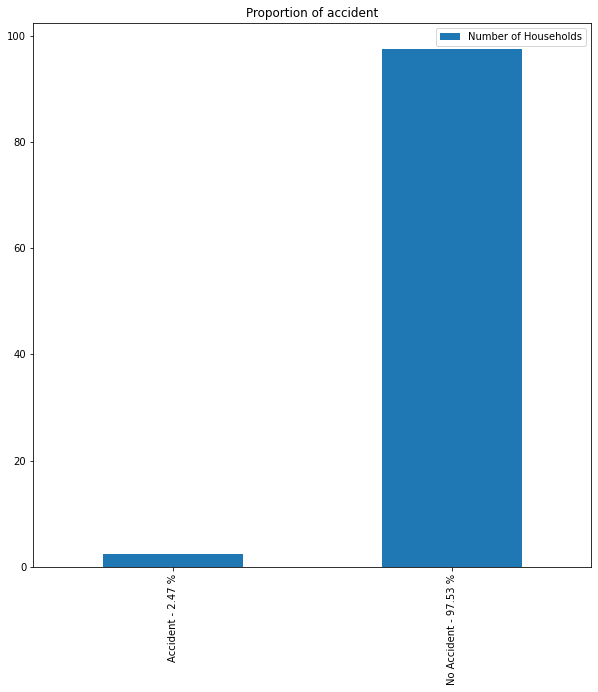

In [161]:
percent = [accident_perc, No_accident_perc] 
pie_ = pd.DataFrame({'Number of Households': [accident_perc, No_accident_perc]},
                  index = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(index, percent)])

pie_.plot.bar(y ='Number of Households', figsize=(10, 10), title = 'Proportion of accident')


#### Results 
In the MFT energy access: 2.0% accident or 2.2% in the pdf.


Here : per cookstoves: 2.8%, per households: 2.47%

<AxesSubplot:title={'center':'Type of harm/injury'}>

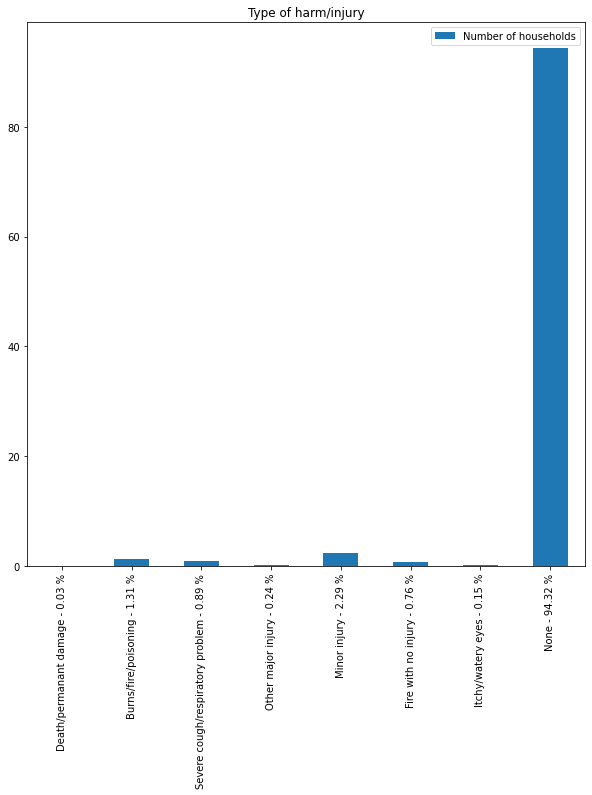

In [162]:
# Plots of the different types of injuries, with the per household dataset.

index = ['Death/permanant damage','Burns/fire/poisoning', 'Severe cough/respiratory problem', 'Other major injury','Minor injury', 'Fire with no injury', 'Itchy/watery eyes','None']

percent = []
for i in range(len(values)):
    percent.append(100*values[i]/sum(values))

pie_ = pd.DataFrame({'Number of households': percent},
                  index=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(index, percent)])


pie_.plot.bar(y='Number of households', figsize=(10, 10), title = 'Type of harm/injury')

## Type of habitat
### Safety of the cooking solution in urban/rural areas

So far, we study and made plots nationwide. Let's try to separate thank to the section B5. See bellow the screenshot:

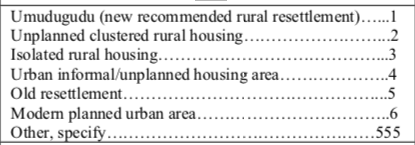

In [164]:
Image("rural_urban.png")

1-2-3= Rural 

4-5-6 = Urban 

In [165]:
# 'type_of_habitat.xlsx' correspond to the section B5 related to the type of habitat.
data_type_of_habitat = pd.read_excel('type_of_habitat.xlsx')
data_type_of_habitat.set_index('Household Identification', inplace=True)
del data_type_of_habitat['Unnamed: 0']
data_type_of_habitat

,B5_What is the type of habitat
Household Identification,
1102020811001,4
1102020811002,4
1102020811003,4
1102020811004,4
1102020811005,4
...,...
5714040157078,1
5714040157079,1
5714040157082,1


In [166]:
# Let's add the type of habitat to the section I so we can separate according to rural/Urban info. 
data_injuries_concat = pd.concat([data_injuries_households, data_type_of_habitat], axis=1)
data_injuries_concat

,I31_1,I31_2,I31_3,I31_4,I31_5,I31_6,I31_7,I31_8,B5_What is the type of habitat
1102020811001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4
1102020811002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4
1102020811003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4
1102020811004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4
1102020811005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4
...,...,...,...,...,...,...,...,...,...
5714040157078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1
5714040157079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1
5714040157082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1
5714040157083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1


## In rural areas


In [167]:
# Selection of rural areas
data_rural_1 = data_injuries_concat[data_injuries_concat['B5_What is the type of habitat'] == 1]
data_rural_2 = data_injuries_concat[data_injuries_concat['B5_What is the type of habitat'] == 2]
data_rural_3 = data_injuries_concat[data_injuries_concat['B5_What is the type of habitat'] == 3]
data_rural = pd.concat([data_rural_1, data_rural_2,data_rural_3], axis=0)


In [170]:
# Count the number of every kind of injury/no injury and store it in values table 
values = []
for i in range(8):
    values.append(len(data_rural.iloc[:, i:i+1].dropna()))

# Count the number of accident and No_accident according to what we defined above.
accident = 0
No_accident = 0

# First 4: accident
for i in range(len(values)-4):
    accident += values[i] 

# Last 4: no accident
for i in range(1,5):
    No_accident += values[-i] 


accident_perc = accident*100/(accident+ No_accident)
No_accident_perc = No_accident*100/(accident+ No_accident)

print("% accident:",accident_perc, "% no accident:",No_accident_perc)

% accident: 2.7027027027027026 % no accident: 97.29729729729729


<AxesSubplot:title={'center':'Proportion of accident in rural areas'}>

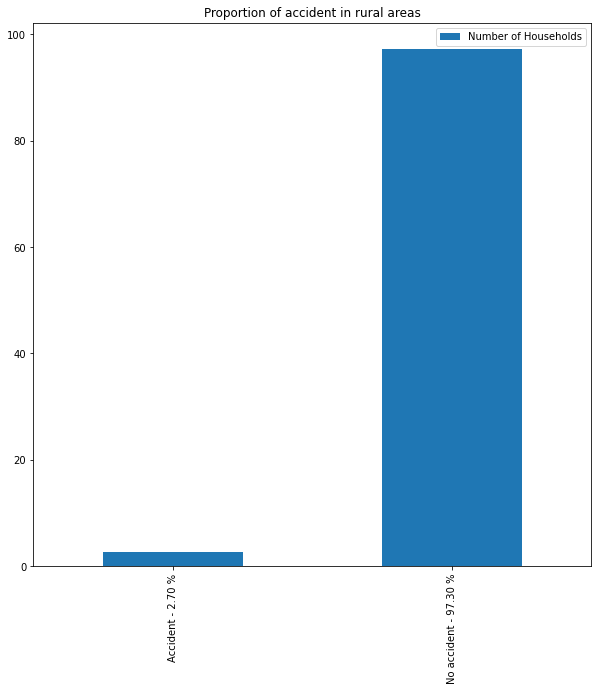

In [169]:
percent = [accident_perc, No_accident_perc] 
index = ['Accident', 'No accident']
pie_ = pd.DataFrame({'Number of Households': [accident_perc, No_accident_perc]},
                  index = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(index, percent)])

pie_.plot.bar(y ='Number of Households', figsize=(10, 10), title = 'Proportion of accident in rural areas')


## In Urban Areas 

In [175]:
# Same with urban areas
data_urban_1 = data_injuries_concat[data_injuries_concat['B5_What is the type of habitat'] == 4]
data_urban_2 = data_injuries_concat[data_injuries_concat['B5_What is the type of habitat'] == 5]
data_urban_3 = data_injuries_concat[data_injuries_concat['B5_What is the type of habitat'] == 6]
data_urban = pd.concat([data_urban_1,data_urban_2,data_urban_3], axis=0)
data_urban

,I31_1,I31_2,I31_3,I31_4,I31_5,I31_6,I31_7,I31_8,B5_What is the type of habitat
1102020811001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4
1102020811002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4
1102020811003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4
1102020811004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4
1102020811005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4
...,...,...,...,...,...,...,...,...,...
5212080152114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,6
5214020452273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,6
5404021154026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,6
5404021154028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,6


In [176]:
# Count the number of every kind of injury/no injury and store it in values table
values = []
for i in range(8):
    values.append(len(data_urban.iloc[:, i:i+1].dropna()))

# Count the number of accident and No_accident according to what we defined above.
accident = 0
No_accident = 0

# First 4: accident
for i in range(len(values)-4):
    accident += values[i] 

# Last 4: no accident
for i in range(1,5):
    No_accident += values[-i] 


accident_perc = accident*100/(accident+ No_accident)
No_accident_perc = No_accident*100/(accident+ No_accident)

print("% accident:",accident_perc, "% no accident:",No_accident_perc)

% accident: 1.4806378132118452 % no accident: 98.51936218678816


<AxesSubplot:title={'center':'Proportion of accident in urban areas'}>

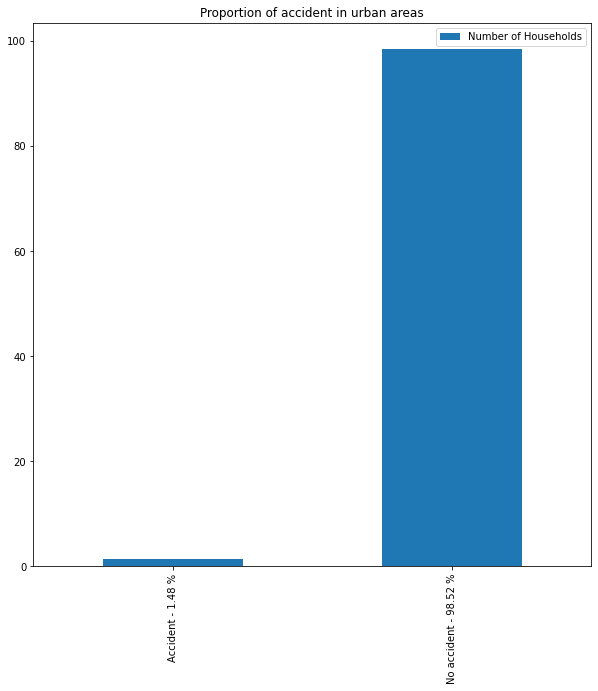

In [177]:
percent = [accident_perc, No_accident_perc] 
index = ['Accident', 'No accident']
pie_ = pd.DataFrame({'Number of Households': [accident_perc, No_accident_perc]},
                  index = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(index, percent)])

pie_.plot.bar(y ='Number of Households', figsize=(10, 10), title = 'Proportion of accident in urban areas')


#### Results 

MTF urban accident : 1.2% - here: 1.48%


MTF rural accident : 2.1% - here: 2.70%

# Safety of electricity

1- Electricity from National Grid 
C41
2- Electricity from Mini Grid 
C83
3- Electric geneator set
C112
4 - Rechargeable Battery 
C130
5- Pico-Hydro
C142
6- Solar device 
C175

Proportion of what they use. 

In [181]:
raw_data = pd.read_excel('complete_dataset.xlsx', sheet_name= 'main_dataset')

#data_C41_injuries = raw_data_C['C41_household member died or damaged because of electricity']


<AxesSubplot:title={'center':'Proportion of accident in urban areas'}>

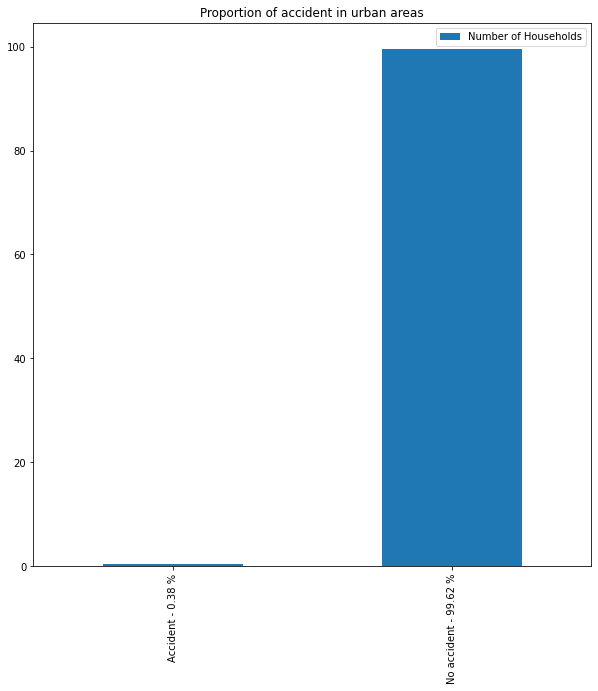

In [197]:
# 1- Electricity from National Grid C41
data_C41 = raw_data[['C41_household member died or damaged because of electricity']]
data_C41 = data_C41.dropna()
data_C41_injuries = data_C41[data_C41['C41_household member died or damaged because of electricity'] == 1.0]
data_C41_no_injuries = data_C41[data_C41['C41_household member died or damaged because of electricity'] == 2.0]


nb_injuries_C41 = len(data_C41_injuries)
nb_no_injuries_C41 = len(data_C41_no_injuries)
total = nb_injuries_C41 + nb_no_injuries_C41
 
injuries_C41_perc = 100*nb_injuries_C41/total
no_injuries_C41_perc = 100*nb_no_injuries_C41/total

percent = [injuries_C41_perc, no_injuries_C41_perc] 
index = ['Accident', 'No accident']
pie_ = pd.DataFrame({'Number of Households': percent},
                  index = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(index, percent)])

pie_.plot.bar(y ='Number of Households', figsize=(10, 10), title = 'Proportion of accident in urban areas')



In [206]:
data_C83 =raw_data[['C83_household members die or injured because of the grid electricity']]
data_C83 = data_C83.dropna()
data_C83_injuries = data_C83[data_C83['C83_household members die or injured because of the grid electricity'] == 1.0]
data_C83_no_injuries = data_C83[data_C83['C83_household members die or injured because of the grid electricity'] == 2.0]

nb_injuries_C83 = len(data_C83_injuries)
nb_no_injuries_C83 = len(data_C83_no_injuries)
total = nb_injuries_C83 + nb_no_injuries_C83
 
injuries_C83_perc = 100*nb_injuries_C83/total
no_injuries_C83_perc = 100*nb_no_injuries_C83/total

percent = [injuries_C83_perc, no_injuries_C83_perc]                                    

In [205]:
data_C112 = raw_data[['C112_household members died or injured because of the generator']]
data_C112 = data_C112.dropna()
data_C112_injuries = data_C112[data_C112['C112_household members died or injured because of the generator'] == 1.0]
data_C112_no_injuries = data_C112[data_C112['C112_household members died or injured because of the generator'] == 2.0]

nb_injuries_C112 = len(data_C112_injuries)
nb_no_injuries_C112 = len(data_C112_no_injuries)
total = nb_injuries_C112 + nb_no_injuries_C112
 
injuries_C112_perc = 100*nb_injuries_C112/total
no_injuries_C112_perc = 100*nb_no_injuries_C112/total

percent = [injuries_C112_perc, no_injuries_C112_perc] 
                                   

In [207]:
data_C130 = raw_data[['C130_household members died  injured because of the rechargeable batteries']]
data_C130 = data_C130.dropna()
data_C130

,C130_household members died injured because of the rechargeable batteries
101,2.0
2690,2.0
2897,2.0
3042,2.0


In [209]:
data_C142 = raw_data[['C142_household members died injured because of the pico-hydro system']]
data_C142 = data_C142.dropna()
data_C142



,C142_household members died injured because of the pico-hydro system
1493,2.0
2365,2.0
2366,2.0
2367,2.0
2370,2.0


In [213]:
data_C175 = raw_data[['C175_household members died or  injured because of the DEVICE']]
data_C175 = data_C175.dropna()


data_C175_injuries = data_C175[data_C175['C175_household members died or  injured because of the DEVICE'] == 1.0]
data_C175_no_injuries = data_C175[data_C175['C175_household members died or  injured because of the DEVICE'] == 2.0]

nb_injuries_C175 = len(data_C175_injuries)
nb_no_injuries_C175 = len(data_C175_no_injuries)
total = nb_injuries_C175 + nb_no_injuries_C175
 
injuries_C175_perc = 100*nb_injuries_C175/total
no_injuries_C175_perc = 100*nb_no_injuries_C175/total

percent = [injuries_C175_perc, no_injuries_C175_perc] 

print(percent)
data_C175
  

[0.0, 100.0]


,C175_household members died or injured because of the DEVICE
10,2.0
73,2.0
188,2.0
191,2.0
360,2.0
...,...
3148,2.0
3242,2.0
3252,2.0
3261,2.0


### Results/ Comments

The number of injuries here is of 0.38% et almost 0 for all the rest, which does ot correspond to the MTF survey, which has a %age of accidents of 4.7% Nationwide.